# **Intermittent Fasting and Cancer: A data analyis report on the effects of Intermittent Fasting on Cancer**
## Data Analysis Report - *Danica Rachel Lim*
### 1 Introduction, Aims and Objectives
#### 1.1 Abstract
***The Possiblities of NLP on the Research space***

The possibilities of NLP in the research space are expanding. As more studies on the effects of Intermittent Fasting (IF) are conducted, numerous opinions and findings on the benefits and risks of IF are being published. Although IF is primarily known for weight loss, recent discoveries suggest potential benefits for cancer patients. This report aims to harness the power of machine learning to assess and review the effects of IF on cancer, providing a comprehensive analysis of available data. By using search strings and exporting data from medical journal websites, we can gather extensive data for processing and analysis using NLP techniques to determine whether IF benefits cancer patients undergoing chemotherapy.


##### 1.1.1 The Selection of the Topic

The selection of this topic was influenced by the podcast "Science Vs." [1] by Gimlet Media. In their episode, "Intermittent Fasting: Hungry for Facts?" they discussed the potential benefits of IF on cancer, which sparked my interest [2]. Further research led to the discovery of a systematic review on this topic.

This report is structured based on the systematic review by Drexler, Dörfler, von Grundherr, Erickson, and Hübner in their paper, "Fasting during cancer treatment: a systematic review," where they utilized several large medical databases to collect results on fasting and cancer [3].

##### 1.1.2 Additional Exploratory Research on NLP and the Medical Field

Natural Language Processing (NLP) is a subfield of artificial intelligence focusing on the interaction between computers and humans through natural language [4]. In the medical field, NLP has been used to extract information from medical records, identify patterns in patient data, and assist in diagnosing diseases. This report aims to determine the effectiveness of NLP in analyzing this topic on IF and cancer, comparing two NLP sentiment analyzers: the Bidirectional Encoder Representations from Transformers (BERT) model and the Valence Aware Dictionary and Sentiment Reasoner (VADER) model.

- VADER: NLTK's (Natural Language Toolkit) built-in, pretrained sentiment analyzer, VADER, specializes in social media content analysis [5].
- BERT: Developed by Google to address limitations in NLP, BERT specializes in sentiment analysis and Named Entity Recognition (NER). BERT's trainable attribute allows it to adjust to specific usages [6].

#### 1.2 Aims and Objectives

To systematically proceed with the data analysis report, here is a breakdown of the aims and objectives, and the methods to address them:

***Aims and Objectives:***

- Gathering and Preparing Data for Analysis and Training:
   - Extract data from PubMed for topic analysis.
   - Collect data for BERT model training.
   - Prepare NLP models for sentiment analysis.
   - Train BERT against a medical journals dataset collected from Kaggle.
   - Analyzing the Data with NLP Techniques:

- Scrape RSS feed from PubMed.
   - Tokenize text content.
   - Apply NLP sentiment analysis on tokenized content.
   - Store results in a pandas dataframe.
   
- Generating a Conclusion Based on the Data Analysis:
   - Compare accuracy results of VADER and BERT on the training dataset.
   - Provide a comprehensive analysis using visualizations.
   - Discuss limitations and potential for future research.

#### 1.3 Data
##### 1.3.1 Scoping the Data
For simplicity, this report focuses on data from one large medical database:

- PubMed: An open-source database of over 37 million resources, ranging from biomedical literature to life science journals, managed by the National Center for Biotechnology Information (NCBI) at the U.S. National Library of Medicine (NLM)[7].

PubMed allows data extraction as CSV, but we opted to web scrape its RSS feed and store it in a dataframe.

SpringerLink was initially considered to be a research and data medium; however, I was not given full-access to the website, making it difficult to obtain complete data. Additionally, it lacked features for quick webscraping, such as RSS. Therefore, it was decided, for the sake of efficiency, to focus on the PubMed.

##### 1.3.2 Data Collection
The data gathered for this report comprises of the RSS feed from PubMed and the Kaggle dataset for training the BERT model.
  - The RSS feed from PubMed was extracted using the BeautifulSoup library, which allowed us to extract the data from the feed and store it in a pandas dataframe.
  - The Kaggle dataset was used to train the BERT model. The dataset contains abstracts from medical journals, which will be used to train the model to analyse the data from PubMed.

##### 1.3.3 Limitations of the Data
- The data from PubMed and Kaggle is limited to abstract text, which may not provide sufficient information for effective BERT model training.

- Due to CPU limitations, the BERT model was trained on a smaller dataset (100 entries instead of the initial 6000), potentially affecting accuracy.

- Only PubMed was used for sentiment analysis, but using multiple databases could improve accuracy and reliability.

#### 1.4 Ethical Considerations
##### 1.4.1 Data Privacy
- ***Data extracted from PubMed:***
The data webscraped from PubMed was used in accordance with their terms of service, which allows for the use of the data for research purposes. PubMed being a website managed by the U.S government are not subject to copyright laws. Thus, any works uploaded into their database is freely available to the public. 

- ***Data from Kaggle:***
The data from Kaggle was also used in accordance with their terms of service, which allows for the use of the data for research purposes. The data was not used for any commercial purposes and was only used for research purposes.

##### 1.4.2 Use and Misuse of Data
The data extracted from both PubMed and Kaggle are publicly available, thus anyone who seeks to can access the data through their respective websites. However, the analysis and conclusions of the NLP model interpreted in this report are entirely my own.

##### 1.4.2 Potential impacts of the sentiment analysis
The sentiment analysis conducted in this report is based on the abstract text of the papers, which may not provide a comprehensive view of the data. The results of the sentiment analysis should be taken with caution, as they may not be entirely accurate.


#### 2 Setting up the Environment for NLP
##### 2.1 Importing the Libraries

In [2]:
# Import libraries and modules
import pandas as pd  # Panda dataframe
import requests # Python HTTP handler
from bs4 import BeautifulSoup # Web scraping

import nltk # Natural Language Toolkit
from nltk.sentiment.vader import SentimentIntensityAnalyzer # Sentiment analysis VADER

import matplotlib.pyplot as plt # Plotting
import seaborn as sns # Plot styling

from transformers import BertTokenizer, BertForSequenceClassification # BERT model
from torch.nn.functional import softmax # Softmax function
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset # Data loader
from torch.optim import AdamW # Adam optimizer
import torch # PyTorch

from sklearn.model_selection import train_test_split # Train-test split
from sklearn.metrics import accuracy_score # Evaluation metrics

import numpy as np # Numpy


Load the NLP models: VADER and BERT.

In [3]:
# VADER model
nltk.download('vader_lexicon')  # Download VADER lexicon
sia = SentimentIntensityAnalyzer() # Load VADER model

# BERT model
# Load pre-trained model tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased') # Load pre-trained tokenizer
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2) # Load pre-trained model

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/masterdumpling/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


##### 2.2 Training the BERT Model for Sentiment Analysis
To improve the accuracy of the BERT model against medical jargons and terminologies, we will fine-tune the model to better understand the context of the data. The BERT model will be trained on a dataset, taken from Kaggle, that compiles a list of medical journals and their abstracts [8]. The BERT model will be trained by analysizing the abstracts and determining whether the content is positive or negative towards medical papers. After training, the BERT model will be used to predict the sentiment of the data extracted from the results of the search string on Intermittent Fasting and Cancer, inputted in PubMed.

Here we will begin by training the BERT model on the training dataset. We will load the dataset and store it as a pandas dataframe, then only access the relevant information: the abstracts and the labels (classification system for articles). The BERT model will be trained on the abstracts and the label, and then tested on the data extracted from PubMed.

In [4]:
# Load training dataset and extract texts and labels for BERT
df = pd.read_csv('./training/train 2.csv')
texts = df['abstract'].values # Extract texts
labels = df['label'].values  # Extract labels

This function will prep the texts for training by tokenizing the abstracts for the BERT model, and then return the tokenized text and the attention mask. The attention mask is a binary tensor that will be used to mask the padding of the text. This will allow the model to focus on the actual content of the text, rather than the padding.

In [5]:
# Tokenize texts
def tokenize_texts(texts):
    input_ids = [] # Initialize input_ids
    attention_masks = [] # Initialize attention_masks

    for text in texts: # For each text in input texts
        encoded = tokenizer.encode_plus( # Encode text
            text,
            add_special_tokens=True,
            max_length=512,
            padding='max_length',
            return_attention_mask=True,
            truncation=True,
            return_tensors='pt',
        )
        input_ids.append(encoded['input_ids']) # push into input_ids
        attention_masks.append(encoded['attention_mask']) # push into attention_masks

    return torch.cat(input_ids, dim=0), torch.cat(attention_masks, dim=0) # Return input_ids and attention_masks

input_ids, attention_masks = tokenize_texts(texts) # Tokenize texts
labels = torch.tensor(labels) # Convert labels to tensor

Now that we have successfully extracted and tokenized the necessary data, we can prepare the data for training and validating in the PyTorch framework. Here we will split the data into two, 90% for training and 10% for validating.

In [6]:
# Prepare data for BERT training
# Split data into train and validation sets
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, random_state=2018, test_size=0.1)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels, random_state=2018, test_size=0.1)

# Create DataLoaders
batch_size = 16

train_data = TensorDataset(train_inputs, train_masks, train_labels) # Create train data
train_sampler = RandomSampler(train_data) # Create train sampler
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size) # Create train dataloader

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels) # Create validation data
validation_sampler = SequentialSampler(validation_data) # Create validation sampler
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size) # Create validation dataloader

Here we will begin training the BERT model. Before we input the dataset for training, we wil optimize the training process with the AdamW optimizer.

In [7]:
# Train BERT model
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8) # Adam optimizer
epochs = 4 

# Training loop
for epoch in range(epochs):
    model.train() # Set model to training mode
    total_loss = 0 # Initialize total loss
    
    for step, batch in enumerate(train_dataloader): # For each batch
        b_input_ids, b_input_mask, b_labels = batch # Extract batch inputs, masks, and labels
        model.zero_grad() # Zero gradients to prevent accumulation
        
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels) # Forward pass
        loss = outputs.loss # Compute loss
        total_loss += loss.item() # Accumulate loss
        
        loss.backward() # Backward pass
        optimizer.step() # Update weights
    
    avg_train_loss = total_loss / len(train_dataloader) # Compute average training loss
    print(f'Epoch {epoch + 1} - Average training loss: {avg_train_loss}') # Print average training loss

Epoch 1 - Average training loss: 0.6515156328678131
Epoch 2 - Average training loss: 0.49229690432548523
Epoch 3 - Average training loss: 0.36785243451595306
Epoch 4 - Average training loss: 0.2631012946367264


After training the model, we can check the performance and accuracy of the trained model.

In [8]:
# Evaluate BERT model on validation set
model.eval() # Set model to evaluation mode
predictions, true_labels = [], [] # Initialize predictions and true labels
# Check if a GPU is available and if not, use a CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for batch in validation_dataloader:
    batch = tuple(t.to(device) for t in batch) # Push batch to GPU
    b_input_ids, b_input_mask, b_labels = batch # Extract batch inputs, masks, and labels
    
    with torch.no_grad(): # Disable gradient calculation
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask) # Forward pass
    
    logits = outputs.logits # Extract logits
    logits = logits.detach().cpu().numpy() # Push logits to CPU
    label_ids = b_labels.to('cpu').numpy() # Push labels to CPU
    
    predictions.append(logits) # Append predictions
    true_labels.append(label_ids) # Append true labels

# Calculate the accuracy of BERT model
predicted_labels = np.concatenate([logits.argmax(axis=1) for logits in predictions]) # Concatenate predicted labels
true_labels = np.concatenate(true_labels) # Concatenate true labels
bert_accuracy = accuracy_score(true_labels, predicted_labels) * 100 # Compute accuracy
print(f'Validation Accuracy: {bert_accuracy}%') # Print accuracy

Validation Accuracy: 72.72727272727273%


This function will act compare the 3 possible sentiments of the inputted text ("positive", "negative", and "neutral"), using the trained BERT model. The function will return the sentiment of the text, based on the highest probability of the 3 sentiments. 

In [9]:
# Predict sentiment using BERT model
def predict_sentiment(text):
    # Encode text and move to the correct device
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    inputs = {k: v.to(device) for k, v in inputs.items()} # Push inputs to GPU
    
    # Predict
    with torch.no_grad(): # Disable gradient calculation
        logits = model(**inputs).logits # Forward pass
    
    # Softmax to get probabilities
    probabilities = softmax(logits, dim=1).flatten().cpu().numpy()
    
    # Map model output to sentiment labels
    labels = ['Negative', 'Neutral', 'Positive']
    sentiment = labels[probabilities.argmax()]
    
    return sentiment


##### VADER implementation 
With VADER, we will utilise keywords to determine the sentiment of an article, and then return the sentiment of the article. The function will return the sentiment of the text, based on the highest probability of the 3 sentiments.

In [10]:

# Sentiment analysis using VADER
def categorize_sentiment(score):
    if score > 0.05: # Positive sentiment
        return 'Positive'
    elif score < -0.05: # Negative sentiment
        return 'Negative'
    else: # Neutral sentiment
        return 'Neutral'


Here we will calculate the accuracy of the VADER model, by comparing the predicted sentiment of the VADER model to the sentiment score in the training dataset.

In [11]:
# Calculate accuracy of VADER model on training dataset
df['l'] = df['abstract'].apply(lambda x: 1 if sia.polarity_scores(x)['compound'] > 0 else 0) # Predict sentiment using VADER

# Calculate accuracy
vader_accuracy = (df['l'] == df['label']).mean() * 100

# Print accuracy
print(f"VADER Accuracy: {vader_accuracy}%")

VADER Accuracy: 38.613861386138616%


Comparing the accuracy of the BERT model and the VADER model, we can determine which model is more effective in analysing the data.

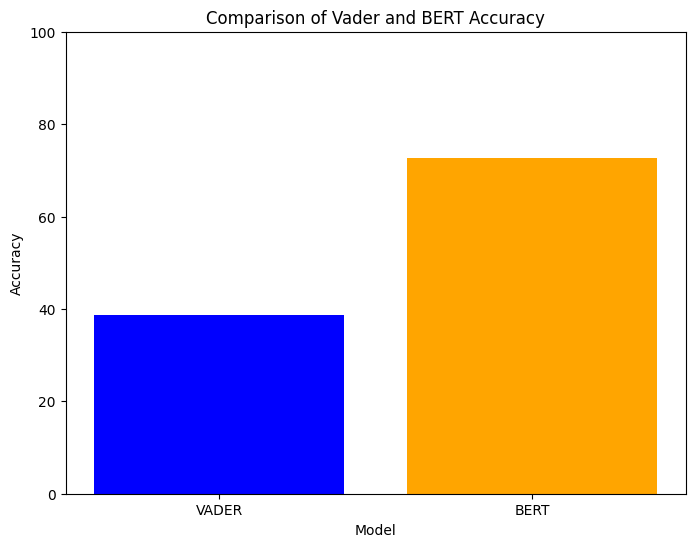

In [12]:
# Comparison of Vader and BERT Accuracy
models = ['VADER', 'BERT']
accuracies = [vader_accuracy, bert_accuracy]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'orange'], alpha=1)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Vader and BERT Accuracy')
plt.ylim(0, 100)  # Set the y-axis limits
plt.show()

As we see the BERT model is more accurate in predicting the sentiment of the text, we will use the BERT model to analyse the data extracted from PubMed.

#### 2.3 Webscraping articles
After webscraping the RSS feed of PubMed, under the search string: "Intermittent Fasting and Cancer", we will apply VADER and BERT on the raw data and store the results in a panda dataframe. 

In [13]:
# Webscrape & store in panda dataframe
# RSS feed URL
rss_url = 'https://pubmed.ncbi.nlm.nih.gov/rss/search/1tWFU8NPBWCUSv_pSgQgYD1NoJp3qLH3sECBt7evrkahp-Wk1j/?limit=100&utm_campaign=pubmed-2&fc=20240701085403'

# Fetch the RSS feed
response = requests.get(rss_url)
rss_content = response.content

# Parse the RSS feed
soup = BeautifulSoup(rss_content, 'xml')

# Extract data
items = soup.find_all('item')
# print("items: ", items)

# Initialize an empty list to store data
data = []

# Iterate through items and extract data
for item in items:
    # Extract necessary data
    pub_date = item.find('pubDate').text
    content = item.find('content:encoded').text

    # Clean encoded content
    clean_content = BeautifulSoup(content, 'html.parser').get_text() 
    
    # Get sentiment scores of VADER & BERT
    sentiment_score = sia.polarity_scores(clean_content)['compound'] # Numeric VADER sentiment score
    vader_sentiment = categorize_sentiment(sentiment_score) # VADER Sentiment Stance
    bert_sentiment = predict_sentiment(clean_content) # BERT Sentiment Stance

    # Append a dictionary with the data to the list
    data.append({
        'Publication Date': pub_date,
        'Content': clean_content,
        'VADER Stance': vader_sentiment,
        'BERT Stance': bert_sentiment,
    })

# Convert the list to a DataFrame
df = pd.DataFrame(data)

##### Comparing the results of VADER and trained BERT model
VADER, being a pretrained sentiment analyzer that specializes in social media content, is less suited for long, technical content. This makes it less accurate for the specific topic of this report.

On the other hand, BERT is a large transformer model that can be fine-tuned to suit specific NLP tasks. In our case, we focus on sentiment analysis. Since BERT can be trained to improve accuracy for particular topics, the results showed that, after training a BERT model on medical journals, it provided more accurate sentiment analysis than VADER, based on manual comparison. Therefore, we will base our conclusion primarily on the results of the BERT model.

However, here is the results of the VADER model and the BERT model, for comparison:

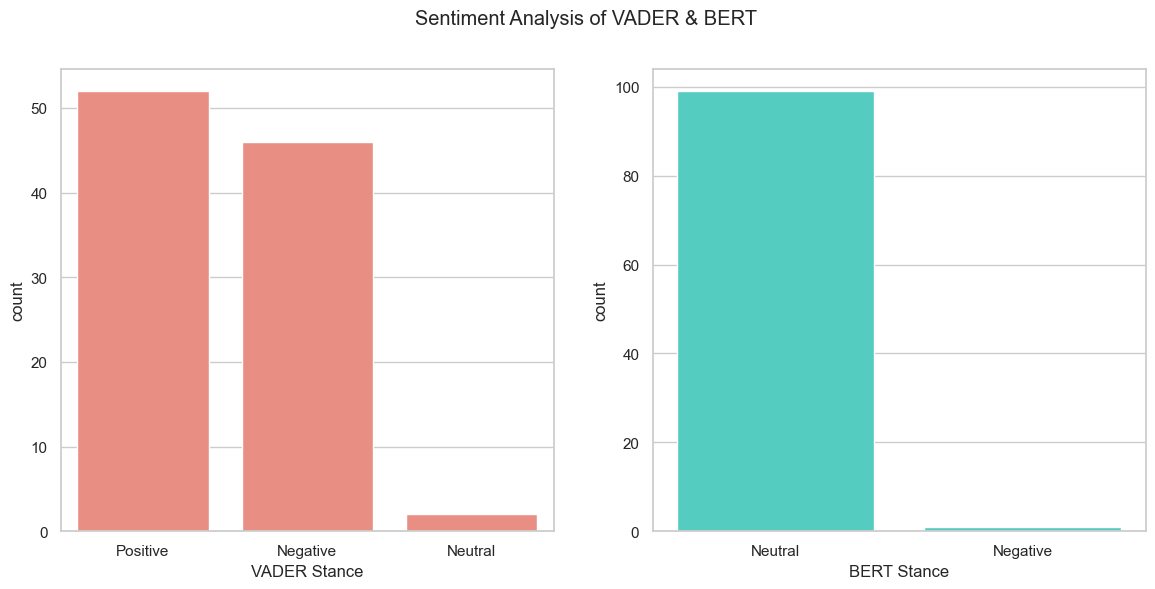

In [14]:
# Set the style of seaborn
sns.set_theme(style="whitegrid")
sns.color_palette("husl", 8)

# Plot the distribution of tones
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(data=df, x='VADER Stance', ax=axs[0], color='salmon')
sns.countplot(data=df, x='BERT Stance', ax=axs[1], color='turquoise')
fig.suptitle('Sentiment Analysis of VADER & BERT')
plt.show()

### 3 Conclusion

#### 3.1 Summary of the Results
After running both the VADER and BERT models on the data extracted from Kaggle, we observed that the BERT model is more accurate in predicting the sentiment of the text. The BERT model was trained on a dataset of medical journals, which allowed it to better understand the context of the data and provide more precise results. Conversely, the VADER model, being a pretrained model, was less accurate in predicting the sentiment of the text, as it is more suited for social media content rather than long, technical content.

***The results of the BERT model***

The BERT model indicates that the majority of the articles are neutral. Additionally, none of the articles resulted in a positive sentiment. This suggests that many of the recent studies on the topic are still inconclusive and that there is insufficient evidence to support the benefits of IF for cancer patients undergoing chemotherapy.

See graph below:

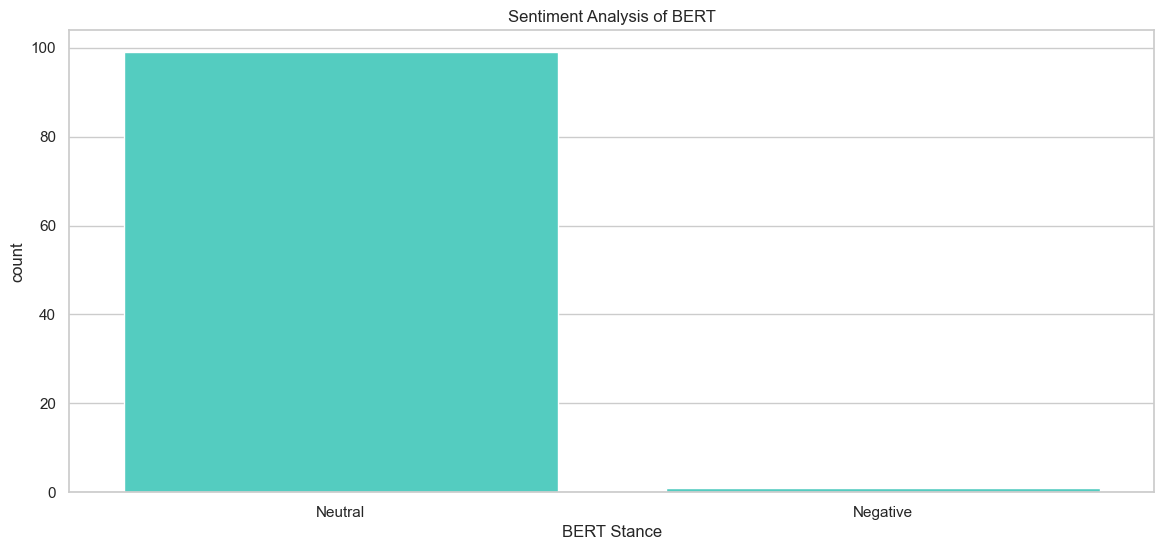

In [15]:
# Set the style of seaborn
sns.set_theme(style="whitegrid")
sns.color_palette("husl", 8)

# Plot the distribution of tones
plt.figure(figsize=(14, 6))
sns.countplot(data=df ,x='BERT Stance', color='turquoise')
plt.title('Sentiment Analysis of BERT')
plt.show()

This results aligns with the systematic review of Drexler, Dörfler, von Grundherr, Erickson & Hübner, in their paper: "Fasting during cancer treatment: a systematic review", where they found that there is not enough evidence to support the benefits of fasting during cancer treatment.

#### 3.2 Potential for Future Research
The results of applying NLP models to medical articles demonstrate the potential to increase research efficiency in the medical field. By using NLP models, we can quickly analyze large amounts of data and determine the effectiveness of certain treatments. In the future, it would be beneficial to train the BERT model on a larger dataset to improve its accuracy. Additionally, using multiple databases to gather data would ensure more accurate and reliable results.

Hopefully, more research on the topic of IF and cancer will be conducted in the future, allowing us to determine whether IF is a beneficial treatment for cancer patients undergoing chemotherapy. Since 2022, there has been a growing interest in IF within the medical field. We hope this interest continues, leading to more studies and a better understanding of its effects.

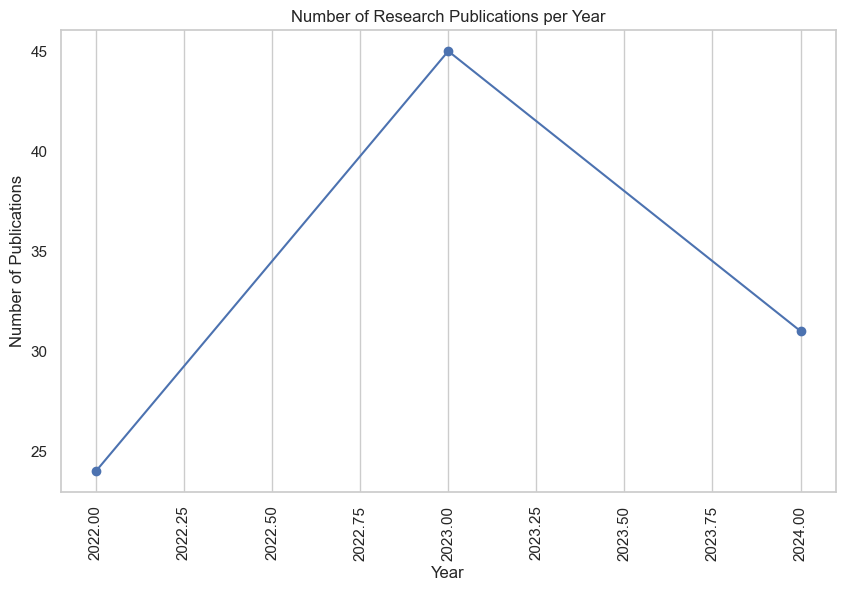

In [16]:
# Convert 'Publication Date' to datetime
df['Publication Date'] = pd.to_datetime(df['Publication Date'], utc=True)

# # Extract the year from 'Publication Date' and create a new column 'Year'
df['Year'] = df['Publication Date'].dt.year

# # Aggregate the data by year, counting the number of publications each year
publications_per_year = df.groupby('Year').size()

# # Plot the data as a line graph
plt.figure(figsize=(10, 6))
publications_per_year.plot(kind='line', marker='o')  # Added marker for better visibility of data points
plt.title('Number of Research Publications per Year')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

### 7 References
[1] Gimlet Media. (2015). Science Vs. [Podcast]. Retrieved from https://gimletmedia.com/shows/science-vs

[2] Gimlet Media. (2024). Intermittent Fasting: Hungry for Facts? [Podcast]. Retrieved from https://gimletmedia.com/shows/science-vs/6nh3vl4a/intermittent-fasting-hungry-for-facts

[3] U. Drexler, J. Dörfler, J. von Grundherr, N. Erickson & J. Hübner. (2024). Fasting during cancer treatment: a systematic review [Article]. Retrieved from https://link.springer.com/article/10.1007/s11136-022-03300-1

[4] J. Holdsworth. (2024). What is NLP (natural language processing). Retrieved from https://www.ibm.com/topics/natural-language-processing

[5] M. Mogyorosi. Sentiment Analysis: First Steps With Python's NLTK Library. Retrieved from https://realpython.com/python-nltk-sentiment-analysis/#using-nltks-pre-trained-sentiment-analyzer

[6] B. Muller. (2022) BERT 101 🤗 State Of The Art NLP Model Explained. Retrieved from https://huggingface.co/blog/bert-101#1-what-is-bert-used-for 

[7] PubMed. Retrieved from https://pubmed.ncbi.nlm.nih.gov/

[8] Hsling. (2024). Medical paper title and abstract NLP dataset. Retrieved from https://www.kaggle.com/datasets/wolfmedal/medical-paper-title-and-abstract-dataset?resource=download&select=train.csv

[9] National Library of Medicine. (2024) NLM Web Policies. Retrieved from https://www.nlm.nih.gov/web_policies.html
